# `opencadd.databases.klifs` API

This notebook proposes an updated object-oriented API (skeleton only!) for the `opencadd.databases.klifs` module.

## Module structure

In [1]:
from bravado.client import SwaggerClient

KLIFS_API_DEFINITIONS = "http://klifs.vu-compmedchem.nl/swagger/swagger.json"
KLIFS_CLIENT = SwaggerClient.from_url(
    KLIFS_API_DEFINITIONS, config={"validate_responses": False}
)

## Set up session (remote and local)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [4]:
from opencadd.databases.klifs_new.api import setup_remote, setup_local

In [5]:
# Work with remote KLIFS data
remote = setup_remote()

# Work with local KLIFS data
local = setup_local("../../opencadd/tests/databases/data/KLIFS_download")

In [6]:
print(remote.session_type)
remote.client

remote


SwaggerClient(http://klifs.vu-compmedchem.nl/api)

In [7]:
print(local.session_type)
local.database

local


,species.klifs,kinase.name,structure.pdb,structure.alternate_model,structure.chain,ligand.pdb,ligand.pdb_allosteric,structure.rmsd1,structure.rmsd2,structure.qualityscore,kinase.pocket,structure.resolution,structure.missing_residues,structure.missing_atoms,interaction.fingerprint,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,kinase.name_all,kinase.family,kinase.group,ligand.name,ligand.name_allosteric,structure.dfg,structure.ac_helix,structure.filepath
0,Human,BMX,3sxr,-,A,1N1,-,0.839,1.967,6.4,KELGS____VVKLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...,2.40,4,0,0000000000000010000001000000000000000000000000...,0,0,1,1,0,0,0,0,0,0,0,0,[BMX],Tec,TK,N-(2-CHLORO-6-METHYLPHENYL)-2-({6-[4-(2-HYDROX...,-,out-like,in,KLIFS_download/HUMAN/BMX/3sxr_chainA
1,Human,BRAF,6uuo,-,A,QH1,-,0.806,2.028,5.2,QRI____FGTVYKVAVKMLAFKNEVGVLRKTRVNILLFMGYAIVTQ...,3.29,7,61,0000000000000000000000000000000000000000000000...,0,0,1,1,1,1,0,0,0,0,0,0,[BRAF],RAF,TKL,1-[4-{[1-(3-{[dihydroxy(propyl)-lambda~4~-sulf...,-,in,out-like,KLIFS_download/HUMAN/BRAF/6uuo_chainA
2,Mouse,ABL1,1fpu,-,A,PRC,-,0.925,2.319,8.8,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.40,0,8,0000000000000010000000000000000000000000000000...,0,0,1,1,0,0,0,1,0,0,0,0,"[Abl1, ABL1]",Abl,TK,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...,-,out,out,KLIFS_download/MOUSE/ABL1/1fpu_chainA
3,Mouse,ABL1,1fpu,-,B,PRC,-,0.925,2.329,9.2,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.40,0,4,0000000000000010000000000000000000000000000000...,0,0,0,1,0,0,0,1,0,0,0,0,"[Abl1, ABL1]",Abl,TK,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...,-,out,out,KLIFS_download/MOUSE/ABL1/1fpu_chainB


In [8]:
local.database.columns

Index(['species.klifs', 'kinase.name', 'structure.pdb',
       'structure.alternate_model', 'structure.chain', 'ligand.pdb',
       'ligand.pdb_allosteric', 'structure.rmsd1', 'structure.rmsd2',
       'structure.qualityscore', 'kinase.pocket', 'structure.resolution',
       'structure.missing_residues', 'structure.missing_atoms',
       'interaction.fingerprint', 'structure.fp_i', 'structure.fp_ii',
       'structure.bp_i_a', 'structure.bp_i_b', 'structure.bp_ii_in',
       'structure.bp_ii_a_in', 'structure.bp_ii_b_in', 'structure.bp_ii_out',
       'structure.bp_ii_b', 'structure.bp_iii', 'structure.bp_iv',
       'structure.bp_v', 'kinase.name_all', 'kinase.family', 'kinase.group',
       'ligand.name', 'ligand.name_allosteric', 'structure.dfg',
       'structure.ac_helix', 'structure.filepath'],
      dtype='object')

## Kinases

Try out functionalities to request kinase data. Show remote and local access in parallel.

### All kinase groups

In [9]:
remote.kinases.all_kinase_groups()

,kinase.group
0,AGC
1,CAMK
2,CK1
3,CMGC
4,Other
5,STE
6,TK
7,TKL


In [10]:
local.kinases.all_kinase_groups()

,kinase.group
0,TK
1,TKL


### All kinase families

In [11]:
print(remote.kinases.all_kinase_families().shape)
remote.kinases.all_kinase_families().head()

(144, 1)


,kinase.family
0,A6
1,ABC1
2,AKT
3,ALK
4,AUR


In [12]:
print(local.kinases.all_kinase_families().shape)
local.kinases.all_kinase_families().head()

(3, 1)


,kinase.family
0,Tec
1,RAF
2,Abl


### All kinase families in a kinase group

In [13]:
print(remote.kinases.all_kinase_families(group='TK').shape)
remote.kinases.all_kinase_families(group='TK').head()

(31, 1)


,kinase.family
0,ALK
1,Abl
2,Ack
3,Alk
4,Axl


In [14]:
print(local.kinases.all_kinase_families(group='TK').shape)
local.kinases.all_kinase_families(group='TK').head()

(3, 1)


,kinase.family
0,Tec
1,RAF
2,Abl


### All kinase families in a non-existing kinase group

In [15]:
remote.kinases.all_kinase_families(group='XXX')

Expected type to be dict for value [400, 'KLIFS error: A provided group does not exist.'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


In [16]:
local.kinases.all_kinase_families('XXX')

Kinase group XXX not known in local dataset.


### All kinase names

In [17]:
print(remote.kinases.all_kinases().shape)
remote.kinases.all_kinases().head()

(1127, 4)


,kinase.id,kinase.name,kinase.name_full,species.klifs
0,813,4921509C19Rik,RIKEN cDNA 4921509C19 gene,Mouse
1,815,4921509C19Rik,RIKEN cDNA 4921509C19 gene,Mouse
2,814,4921509C19Rik,RIKEN cDNA 4921509C19 gene,Mouse
3,531,Aak1,AP2 associated kinase 1,Mouse
4,277,AAK1,AP2 associated kinase 1,Human


In [18]:
local.kinases.all_kinases()

,kinase.name,species.klifs
0,BMX,Human
1,BRAF,Human
2,ABL1,Mouse


In [19]:
remote.kinases.all_kinases(group='TK', family='Tec', species="Mouse")

,kinase.id,kinase.name,kinase.name_full,species.klifs
0,574,Bmx,BMX non-receptor tyrosine kinase,Mouse
1,583,Btk,Bruton agammaglobulinemia tyrosine kinase,Mouse
2,739,Itk,IL2 inducible T cell kinase,Mouse
3,1008,Tec,tec protein tyrosine kinase,Mouse
4,1039,Txk,TXK tyrosine kinase,Mouse


In [20]:
local.kinases.all_kinases(family="Abl", species="Mouse")

,kinase.name,species.klifs
0,ABL1,Mouse


In [21]:
remote.kinases.all_kinases(group='XXX')

Expected type to be dict for value [400, 'KLIFS error: A provided group does not exist.'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


In [22]:
local.kinases.all_kinases(group='XXX')

### Kinase by kinase ID

In [23]:
remote.kinases.from_kinase_ids(33)

,kinase.id,kinase.name,kinase.hgnc,kinase.family,kinase.group,kinase.class,species.klifs,kinase.name_full,kinase.uniprot,kinase.iuphar,kinase.pocket
0,33,PKCa,PRKCA,PKC,AGC,Alpha,Human,protein kinase C alpha,P17252,1482,MVLGKGSFGKVMLYAIKILCTMVEKRVLALLDPFLTQLHSCYFVME...


In [24]:
remote.kinases.from_kinase_ids(10000)

Expected type to be dict for value [400, 'KLIFS error: An unknown kinase ID was provided'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


In [25]:
remote.kinases.from_kinase_ids([1,2,10000])

,kinase.id,kinase.name,kinase.hgnc,kinase.family,kinase.group,kinase.class,species.klifs,kinase.name_full,kinase.uniprot,kinase.iuphar,kinase.pocket
0,1,AKT1,AKT1,Akt,AGC,,Human,v-akt murine thymoma viral oncogene homolog 1,P31749,1479,KLLGKGTFGKVILYAMKILHTLTENRVLQNSRPFLTALKYSCFVME...
1,2,AKT2,AKT2,Akt,AGC,,Human,v-akt murine thymoma viral oncogene homolog 2,P31751,1480,KLLGKGTFGKVILYAMKILHTVTESRVLQNTRPFLTALKYACFVME...


Get kinase metadata for all kinase IDs.

In [26]:
kinase_ids_all = remote.kinases.all_kinases()["kinase.id"].to_list()
kinases_all = remote.kinases.from_kinase_ids(kinase_ids_all)

In [27]:
kinases_all.shape

(1127, 11)

In [28]:
print(*kinases_all["kinase.family"].unique())

Akt DMPK GRK MAST NDR PDK1 PKA PKC PKG PKN RSK RSKb RSKL RSKR SGK YANK ABC1 Alpha BCR BRD FAST G11 H11 PDHK PIKK RIO TAF1 TIF1 CAMK1 CAMK2 CAMKL CAMK-Unique CASK DAPK DCAMKL MAPKAPK MLCK PHK PIM PKD PSK RAD53 SgK495 Trbl Trio TSSK CK1 TTBK VRK CDK CDKL CK2 CLK DYRK GSK MAPK RCK SRPK Aur BUB Bud32 CAMKK CDC7 Haspin IKK IRE KIS MOS NAK NEK NKF1 NKF2 NKF3 NKF4 NKF5 NRBP Other-Unique PEK STE-Unique PLK SCY1 SgK071 SgK493 SgK496 Slob TBCK TLK TOPK TTK ULK VPS15 WEE WNK RGC STE11 STE20 STE7 Abl Ack ALK Axl CCK4 Csk DDR EGFR Eph FAK Fer FGFR InsR JakA JakB Lmr Met Musk PDGFR Ret Ror Ryk Sev Src Syk Tec Tie TK-Unique Trk VEGFR IRAK LISK LRRK MLK RAF RIPK STKR TKL-Unique A6 AKT Alk AUR Wnk PIK PIPK PAN3 PIP


In [29]:
print(*kinases_all["kinase.group"].unique())

AGC CAMK Atypical CK1 CMGC Other STE RGC TK TKL


In [30]:
kinases_all["kinase.pocket"].iloc[100]

'NQMGVGKESDIYIFALKLHSAMKEFAYMKALYFPVPKPIDYAVVMELINGYPLCQIHHVLANHG-LIHGDFNEFNLILMIDFPQM'

### Kinase by kinase name

In [31]:
remote.kinases.from_kinase_names('BMX')

,kinase.id,kinase.name,kinase.hgnc,kinase.family,kinase.group,kinase.class,species.klifs,kinase.name_full,kinase.uniprot,kinase.iuphar,kinase.pocket
0,574,BMX,Bmx,Tec,TK,,Mouse,BMX non-receptor tyrosine kinase,P97504,0,KELGNGQFGVVQLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...
1,472,BMX,BMX,Tec,TK,,Human,BMX non-receptor tyrosine kinase,P51813,1942,KELGSGQFGVVQLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...


In [32]:
local.kinases.from_kinase_names('BMX')

,kinase.name,species.klifs
0,BMX,Human


In [33]:
remote.kinases.from_kinase_names(['BMX', 'BRAF'])

,kinase.id,kinase.name,kinase.hgnc,kinase.family,kinase.group,kinase.class,species.klifs,kinase.name_full,kinase.uniprot,kinase.iuphar,kinase.pocket
0,574,BMX,Bmx,Tec,TK,,Mouse,BMX non-receptor tyrosine kinase,P97504,0,KELGNGQFGVVQLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...
1,472,BMX,BMX,Tec,TK,,Human,BMX non-receptor tyrosine kinase,P51813,1942,KELGSGQFGVVQLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...
2,509,BRAF,BRAF,RAF,TKL,RAF,Human,"B-Raf proto-oncogene, serine/threonine kinase",P15056,1943,QRIGSGSFGTVYKVAVKMLAFKNEVGVLRKTRVNILLFMGYAIVTQ...
3,575,BRAF,Braf,RAF,TKL,,Mouse,Braf transforming gene,P28028,0,QRIGSGSFGTVYKVAVKMLAFKNEVGVLRKTRVNILLFMGYAIVTQ...


In [34]:
local.kinases.from_kinase_names(['BMX', 'BRAF'])

,kinase.name,species.klifs
0,BMX,Human
1,BRAF,Human


In [35]:
remote.kinases.from_kinase_names(['YYY', 'XXX'])

Kinase name YYY: Expected type to be dict for value [400, 'KLIFS error: An unknown kinase name was provided'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.
Kinase name XXX: Expected type to be dict for value [400, 'KLIFS error: An unknown kinase name was provided'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


In [36]:
local.kinases.from_kinase_names(['YYY', 'XXX'])

### Kinases by kinase names and species

In [37]:
remote.kinases.from_kinase_names(['ABL1', 'NIK'], 'Mouse')

,kinase.id,kinase.name,kinase.hgnc,kinase.family,kinase.group,kinase.class,species.klifs,kinase.name_full,kinase.uniprot,kinase.iuphar,kinase.pocket
0,532,ABL1,Abl1,Abl,TK,,Mouse,"c-abl oncogene 1, non-receptor tyrosine kinase",P00520,0,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...
1,861,NIK,Map3k14,STE-Unique,STE,,Mouse,mitogen-activated protein kinase kinase kinase 14,Q9WUL6,0,PRVGRGSFGEVHRCAVKKVFRVEELVACAGLSPRIVPLYGANIFME...


In [38]:
local.kinases.from_kinase_names(['ABL1', 'NIK'], 'Mouse')

,kinase.name,species.klifs
0,ABL1,Mouse


## Ligands

### All ligands

In [39]:
remote.ligands.all_ligands()

,ligand.id,ligand.pdb,ligand.name,ligand.smiles,ligand.inchikey
0,1,IHZ,5-[(2-methyl-5-{[3-(trifluoromethyl)phenyl]car...,FC(F)(F)c1cc(NC(=O)c2cc(Nc3cncc(c3)C(=O)N)c(cc...,SAAYRHKJHDIDPH-UHFFFAOYSA-N
1,2,477,"3-{2-[5-(difluoromethyl)-2H-thieno[3,2-c]pyraz...",S1C=2C(=NNC2C=C1C(F)F)C=3Nc4c(ccc(c4)C(O)(CC)C...,CQZZZUNOWZUNNG-UHFFFAOYSA-N
2,3,G6K,"1-[(3S)-3-{[4-(morpholin-4-ylmethyl)-6-([1,3]t...",S1c2ncccc2N=C1Nc3nc(nc(c3)CN4CCOCC4)N[C@@H]5CN...,JSHRNKDQLCOTRI-HNNXBMFYSA-N
3,4,G5K,"1-[(3S)-3-{[4-(morpholin-4-ylmethyl)-6-([1,3]t...",S1c2ncccc2N=C1Nc3nc(nc(c3)CN4CCOCC4)N[C@@H]5CN...,LZANMDGKZJPQIB-HNNXBMFYSA-N
4,5,B49,N-[2-(diethylamino)ethyl]-5-[(Z)-(5-fluoro-2-o...,Fc1cc\2c(NC(=O)/C2=C\C=3NC(=C(C(=O)NCCN(CC)CC)...,WINHZLLDWRZWRT-ATVHPVEESA-N
...,...,...,...,...,...
3522,3811,R7D,N~2~-{(2R)-2-hydroxy-2-[4-(trifluoromethyl)phe...,O[C@@H](C(=O)N[C@@H](CS)C(=O)NCc1ccccn1)c2ccc(...,MMSMEDXVHMERGZ-LSDHHAIUSA-N
3523,3812,OQ8,~{N}-[4-[(4-ethylpiperazin-1-yl)methyl]-3-(tri...,FC(F)(F)c1c(ccc(NC(=O)c2cc(Oc3nc(ncc3)N[C@@H]4...,InChI not available
3524,3813,OQ2,~{N}-[4-[(4-ethylpiperazin-1-yl)methyl]-3-(tri...,FC(F)(F)c1c(ccc(NC(=O)c2cc(Oc3nc(ncc3)N[C@H]4C...,InChI not available
3525,3814,IHH,[4-({4-[(5-cyclopropyl-1H-pyrazol-3-yl)amino]q...,N#CCc1ccc(Nc2nc(NC3=NNC(=C3)C4CC4)c5c(n2)cccc5...,InChI not available


In [40]:
local.ligands.all_ligands()

,ligand.pdb,ligand.name
0,1N1,N-(2-CHLORO-6-METHYLPHENYL)-2-({6-[4-(2-HYDROX...
1,QH1,1-[4-{[1-(3-{[dihydroxy(propyl)-lambda~4~-sulf...
2,PRC,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...


### Ligands from kinase ID(s)

In [41]:
remote.ligands.from_kinase_ids(33)

,ligand.id,ligand.pdb,ligand.name,ligand.smiles,ligand.inchikey,kinase.id (query)
0,920,LW4,3-(1H-indol-3-yl)-4-[2-(4-methylpiperazin-1-yl...,O=C1NC(=O)C(=C1c2nc(nc3c2cccc3)N4CCN(CC4)C)C=5...,OAVGBZOFDPFGPJ-UHFFFAOYSA-N,33
1,921,3KZ,"(1R)-9-[(3S,4S)-1,3-dimethylpiperidin-4-yl]-8-...",Fc1c(c2c(cc3N4C(=NNC(=O)[C@H]4C)COc3c2)[C@@H]5...,BLWOBXIQFDYTRF-OAGGEKHMSA-N,33


In [42]:
remote.ligands.from_kinase_ids([33, 34])

,ligand.id,ligand.pdb,ligand.name,ligand.smiles,ligand.inchikey,kinase.id (query)
0,920,LW4,3-(1H-indol-3-yl)-4-[2-(4-methylpiperazin-1-yl...,O=C1NC(=O)C(=C1c2nc(nc3c2cccc3)N4CCN(CC4)C)C=5...,OAVGBZOFDPFGPJ-UHFFFAOYSA-N,33
1,921,3KZ,"(1R)-9-[(3S,4S)-1,3-dimethylpiperidin-4-yl]-8-...",Fc1c(c2c(cc3N4C(=NNC(=O)[C@H]4C)COc3c2)[C@@H]5...,BLWOBXIQFDYTRF-OAGGEKHMSA-N,33
2,759,PDS,3-{1-[3-(DIMETHYLAMINO)PROPYL]-2-METHYL-1H-IND...,O=C1NC(=O)C(C=2c3c(NC2C)cccc3)=C1C=4c5c(N(C4C)...,OHIVGFJSFMOMNC-UHFFFAOYSA-N,34


In [43]:
remote.ligands.from_kinase_ids(574)

Kinase ID 574: Expected type to be dict for value [400, 'KLIFS error: The provided kinase ID(s) is/are invalid'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


### Ligands from kinase name(s)

In [44]:
remote.ligands.from_kinase_names("EGFR")

Kinase ID 663: Expected type to be dict for value [400, 'KLIFS error: The provided kinase ID(s) is/are invalid'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


,ligand.id,ligand.pdb,ligand.name,ligand.smiles,ligand.inchikey,kinase.id (query),kinase.name (query),species.klifs (query)
0,26,ADP,ADENOSINE-5&apos;-DIPHOSPHATE,P(=O)(OP(=O)(O)O)(OC[C@H]1O[C@@H](N2c3ncnc(N)c...,XTWYTFMLZFPYCI-KQYNXXCUSA-N,406,EGFR,Human
1,64,ANP,PHOSPHOAMINOPHOSPHONIC ACID-ADENYLATE ESTER,P(=O)(OP(=O)(O)NP(=O)(O)O)(OC[C@H]1O[C@@H](N2c...,PVKSNHVPLWYQGJ-KQYNXXCUSA-N,406,EGFR,Human
2,140,AMP,ADENOSINE MONOPHOSPHATE,P(=O)(OC[C@H]1O[C@@H](N2c3ncnc(N)c3N=C2)[C@H](...,UDMBCSSLTHHNCD-KQYNXXCUSA-N,406,EGFR,Human
3,217,FI3,"N-[4-({[(2,6-dichloro-3,5-dimethoxyphenyl)carb...",Clc1c(OC)cc(OC)c(Cl)c1NC(=O)N(c2ncnc(Nc3ccc(N4...,JQGSJUDIVJFQRL-UHFFFAOYSA-N,406,EGFR,Human
4,218,W2R,1-{3-[2-chloro-4-({5-[2-(2-hydroxyethoxy)ethyl...,Clc1c(Oc2cc(NC(=O)NC3CCCCC3)ccc2)ccc(Nc4ncnc5c...,WDGCQQKABPWBPZ-UHFFFAOYSA-N,406,EGFR,Human
...,...,...,...,...,...,...,...,...
94,3676,QQJ,N-[3-({4-[4-(4-fluorophenyl)-2-(methylsulfanyl...,c1(ccc(cc1)c1c(c2cc(ncc2)Nc2c(ccc(c2)NC(=O)CC)...,InChI not available,406,EGFR,Human
95,3677,QQM,N-[3-({4-[4-(4-fluorophenyl)-2-(3-hydroxypropy...,Fc1ccc(cc1)C=2N=C(NC2c3cc(ncc3)Nc4c(OC)ccc(NC(...,InChI not available,406,EGFR,Human
96,3678,QP7,3-[4-(4-fluorophenyl)-5-(2-phenyl-1H-pyrrolo[2...,c1(CCCO)[nH]c(c(c2ccc(cc2)F)n1)c1c2c(ncc1)[nH]...,InChI not available,406,EGFR,Human
97,3679,QP4,4-[4-(4-fluorophenyl)-2-(3-methoxypropyl)-1H-i...,c1(CCCOC)[nH]c(c2c3c(ncc2)N=C(C3)c2ccccc2)c(c2...,InChI not available,406,EGFR,Human


In [45]:
local.ligands.from_kinase_names("ABL1")

,ligand.pdb,ligand.name,kinase.name (query),species.klifs (query)
0,PRC,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...,ABL1,Mouse


In [46]:
remote.ligands.from_kinase_names(["EGFR", "BMX"])

Kinase ID 663: Expected type to be dict for value [400, 'KLIFS error: The provided kinase ID(s) is/are invalid'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.
Kinase ID 574: Expected type to be dict for value [400, 'KLIFS error: The provided kinase ID(s) is/are invalid'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


,ligand.id,ligand.pdb,ligand.name,ligand.smiles,ligand.inchikey,kinase.id (query),kinase.name (query),species.klifs (query)
0,26,ADP,ADENOSINE-5&apos;-DIPHOSPHATE,P(=O)(OP(=O)(O)O)(OC[C@H]1O[C@@H](N2c3ncnc(N)c...,XTWYTFMLZFPYCI-KQYNXXCUSA-N,406,EGFR,Human
1,64,ANP,PHOSPHOAMINOPHOSPHONIC ACID-ADENYLATE ESTER,P(=O)(OP(=O)(O)NP(=O)(O)O)(OC[C@H]1O[C@@H](N2c...,PVKSNHVPLWYQGJ-KQYNXXCUSA-N,406,EGFR,Human
2,140,AMP,ADENOSINE MONOPHOSPHATE,P(=O)(OC[C@H]1O[C@@H](N2c3ncnc(N)c3N=C2)[C@H](...,UDMBCSSLTHHNCD-KQYNXXCUSA-N,406,EGFR,Human
3,217,FI3,"N-[4-({[(2,6-dichloro-3,5-dimethoxyphenyl)carb...",Clc1c(OC)cc(OC)c(Cl)c1NC(=O)N(c2ncnc(Nc3ccc(N4...,JQGSJUDIVJFQRL-UHFFFAOYSA-N,406,EGFR,Human
4,218,W2R,1-{3-[2-chloro-4-({5-[2-(2-hydroxyethoxy)ethyl...,Clc1c(Oc2cc(NC(=O)NC3CCCCC3)ccc2)ccc(Nc4ncnc5c...,WDGCQQKABPWBPZ-UHFFFAOYSA-N,406,EGFR,Human
...,...,...,...,...,...,...,...,...
97,3679,QP4,4-[4-(4-fluorophenyl)-2-(3-methoxypropyl)-1H-i...,c1(CCCOC)[nH]c(c2c3c(ncc2)N=C(C3)c2ccccc2)c(c2...,InChI not available,406,EGFR,Human
98,3680,QP1,N-{3-[(4-{4-(4-fluorophenyl)-2-[(2-methoxyethy...,c1cc(ccc1c1c(c2cc(ncc2)Nc2cc(ccc2OC)NC(=O)CC)[...,InChI not available,406,EGFR,Human
99,281,1N1,N-(2-CHLORO-6-METHYLPHENYL)-2-({6-[4-(2-HYDROX...,Clc1c(NC(=O)C=2SC(=NC2)Nc3nc(nc(N4CCN(CCO)CC4)...,ZBNZXTGUTAYRHI-UHFFFAOYSA-N,472,BMX,Human
100,632,PP2,1-TERT-BUTYL-3-(4-CHLORO-PHENYL)-1H-PYRAZOLO[3...,Clc1ccc(cc1)C2=[NH+]N(c3ncnc(N)c32)C(C)(C)C,PBBRWFOVCUAONR-UHFFFAOYSA-O,472,BMX,Human


In [47]:
local.ligands.from_kinase_names(["ABL1", "BMX"])

,ligand.pdb,ligand.name,kinase.name (query),species.klifs (query)
0,1N1,N-(2-CHLORO-6-METHYLPHENYL)-2-({6-[4-(2-HYDROX...,BMX,Human
1,PRC,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...,ABL1,Mouse


### Ligands from ligand ID(s)

In [48]:
remote.ligands.from_ligand_ids(33)

,ligand.id,ligand.pdb,ligand.name,ligand.smiles,ligand.inchikey
32,33,MJG,N-[5-({5-[(4-acetylpiperazin-1-yl)carbonyl]-4-...,S(c1c(cc(OC)c(c1)C(=O)N2CCN(C(=O)C)CC2)C)C=3SC...,ZHXNIYGJAOPMSO-NRFANRHFSA-N


In [49]:
remote.ligands.from_ligand_ids([33, 300, 400000000])

,ligand.id,ligand.pdb,ligand.name,ligand.smiles,ligand.inchikey
32,33,MJG,N-[5-({5-[(4-acetylpiperazin-1-yl)carbonyl]-4-...,S(c1c(cc(OC)c(c1)C(=O)N2CCN(C(=O)C)CC2)C)C=3SC...,ZHXNIYGJAOPMSO-NRFANRHFSA-N
299,300,057,"N-(2-hydroxy-1,1-dimethylethyl)-1-methyl-3-(1H...",O=C(NC(CO)(C)C)c1cc2c(N(C=C2C=3Nc4ncccc4C3)C)cc1,XZRYCTLOGNCQDG-UHFFFAOYSA-N


### Ligands from ligand PDB ID(s)

In [50]:
remote.ligands.from_ligand_pdbs("STI")

,ligand.id,ligand.pdb,ligand.name,ligand.smiles,ligand.inchikey
47,48,STI,4-(4-METHYL-PIPERAZIN-1-YLMETHYL)-N-[4-METHYL-...,O=C(Nc1cc(Nc2nc(c3cnccc3)ccn2)c(cc1)C)c4ccc(cc...,KTUFNOKKBVMGRW-UHFFFAOYSA-N


In [51]:
local.ligands.from_ligand_pdbs("PRC")

,ligand.pdb,ligand.name
0,PRC,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...


In [52]:
remote.ligands.from_ligand_pdbs("XXX")

In [53]:
local.ligands.from_ligand_pdbs("XXX")

In [54]:
remote.ligands.from_ligand_pdbs(["STI", "STU"])

,ligand.id,ligand.pdb,ligand.name,ligand.smiles,ligand.inchikey
27,28,STU,STAUROSPORINE,O=C1NCc2c3c4N(c5c3cccc5)[C@]6(O[C@@H](N7c4c(c8...,HKSZLNNOFSGOKW-FYTWVXJKSA-N
47,48,STI,4-(4-METHYL-PIPERAZIN-1-YLMETHYL)-N-[4-METHYL-...,O=C(Nc1cc(Nc2nc(c3cnccc3)ccn2)c(cc1)C)c4ccc(cc...,KTUFNOKKBVMGRW-UHFFFAOYSA-N


In [55]:
local.ligands.from_ligand_pdbs(["PRC", "STU"])

,ligand.pdb,ligand.name
0,PRC,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...


## Structures

### All structures

In [56]:
structures_all = remote.structures.all_structures()
structures_all

,structure.id,kinase.name,species.klifs,kinase.id,structure.pdb,structure.alternate_model,structure.chain,structure.rmsd1,structure.rmsd2,kinase.pocket,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,ligand.pdb,ligand.pdb_allosteric,structure.dfg,structure.ac_helix,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v
0,2533,AKT1,Human,1,3ow4,,B,0.780,2.104,KLLGKGTFGKVILYAMKILHTLTENRVLQNSRPFLTALKYSCFVME...,2.60,8.0,0,0,SMY,0,in,in,19.1640,61.7818,50.6247,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,2532,AKT1,Human,1,3mv5,B,A,0.779,2.092,KLLGKGTFGKVILYAMKILHTLTENRVLQNSRPFLTALKYSCFVME...,2.47,8.0,0,0,XFE,0,in,in,17.3969,57.0919,55.1666,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,10437,AKT1,Human,1,6c0i,B,B,0.776,2.091,KLLGKGTFGKVILYAMKILHTLTENRVLQNSRPFLTALKYSCFVME...,2.40,8.0,0,0,0,0,in,in,17.9011,59.5948,60.8725,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2542,AKT1,Human,1,4ejn,,A,0.950,2.319,KLLGKGTFGKVILYAMKIL_______VLQNSRPFLTALKYSCFVME...,2.19,4.4,7,22,0,0R4,out,na,18.9798,65.3415,56.1927,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,10914,AKT1,Human,1,6hhj,,A,0.977,2.648,KLLGKGTFGKVILYAMKILHTLTENRVLQNSRPFLTALKYSCFVME...,2.30,6.8,0,0,G4H,0,out,out,20.4394,68.7584,59.0980,False,False,True,False,False,False,False,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11372,9097,PI4K2B,Human,1091,4wtv,A,B,1.554,3.041,ERIS___SGSYFVGVFKPKGYLSEAGAYLVDNSIVPKTKVVGSFQL...,1.90,8.2,3,2,ATP,0,in,in,0.0000,0.0000,0.0000,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
11373,9095,PI4K2B,Human,1091,4wtv,A,A,1.554,3.088,ERISQGSSGSYFVGVFKPKGYLSEAGAYLVDNSIVPKTKVVGSFQL...,1.90,8.9,0,7,ATP,0,in,in,19.2476,61.8136,21.5262,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
11374,9096,PI4K2B,Human,1091,4wtv,B,B,1.554,3.041,ERIS___SGSYFVGVFKPKGYLSEAGAYLVDNSIVPKTKVVGSFQL...,1.90,8.2,3,2,ATP,0,in,in,0.0000,0.0000,0.0000,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
11375,9070,PI4KA,Human,1096,6bq1,,A,1.704,2.676,_PMQSAAKAPYLAAIFKVGDCRQDMLALQIIDLFVFPYRVVCGVIE...,0.00,6.8,2,0,E4S,0,in,in,18.3243,58.9635,131.1870,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [57]:
structures_all.columns

Index(['structure.id', 'kinase.name', 'species.klifs', 'kinase.id',
       'structure.pdb', 'structure.alternate_model', 'structure.chain',
       'structure.rmsd1', 'structure.rmsd2', 'kinase.pocket',
       'structure.resolution', 'structure.qualityscore',
       'structure.missing_residues', 'structure.missing_atoms', 'ligand.pdb',
       'ligand.pdb_allosteric', 'structure.dfg', 'structure.ac_helix',
       'structure.grich_distance', 'structure.grich_angle',
       'structure.grich_rotation', 'structure.front', 'structure.gate',
       'structure.back', 'structure.fp_i', 'structure.fp_ii',
       'structure.bp_i_a', 'structure.bp_i_b', 'structure.bp_ii_in',
       'structure.bp_ii_a_in', 'structure.bp_ii_b_in', 'structure.bp_ii_out',
       'structure.bp_ii_b', 'structure.bp_iii', 'structure.bp_iv',
       'structure.bp_v'],
      dtype='object')

In [58]:
structures_all["structure.alternate_model"].unique()

array(['', 'B', 'A', 'C', 'D', '16', '10', '8', '13', '17', '1', '3',
       '18', '9', '2', '14', '19', '5', '15', '4', '20', '12', '11', '6',
       '7'], dtype=object)

In [59]:
structures_all[structures_all["ligand.pdb"] == 0]

,structure.id,kinase.name,species.klifs,kinase.id,structure.pdb,structure.alternate_model,structure.chain,structure.rmsd1,structure.rmsd2,kinase.pocket,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,ligand.pdb,ligand.pdb_allosteric,structure.dfg,structure.ac_helix,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v
2,10437,AKT1,Human,1,6c0i,B,B,0.776,2.091,KLLGKGTFGKVILYAMKILHTLTENRVLQNSRPFLTALKYSCFVME...,2.40,8.0,0,0,0,0,in,in,17.9011,59.5948,60.8725,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2542,AKT1,Human,1,4ejn,,A,0.950,2.319,KLLGKGTFGKVILYAMKIL_______VLQNSRPFLTALKYSCFVME...,2.19,4.4,7,22,0,0R4,out,na,18.9798,65.3415,56.1927,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,10433,AKT1,Human,1,6buu,B,A,0.778,2.092,KLLGKGTFGKVILYAMKILHTLTENRVLQNSRPFLTALKYSCFVME...,2.40,8.0,0,0,0,0,in,in,17.9694,60.9649,60.1658,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,10431,AKT1,Human,1,6c0i,B,A,0.778,2.092,KLLGKGTFGKVILYAMKILHTLTENRVLQNSRPFLTALKYSCFVME...,2.40,8.0,0,0,0,0,in,in,17.9694,60.9649,60.1658,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,10881,AKT1,Human,1,6npz,A,B,0.776,2.092,KLLGKGTFGKVILYAMKILHTLTENRVLQNSRPFLTALKYSCFVME...,2.12,8.0,0,0,0,0,in,in,17.9407,60.2614,66.1354,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11333,9342,PIK3C3,Human,1088,4uwk,A,A,1.542,3.004,ATLFKSALMPAQLVIFKHGDLRQDQLILQIISLKLTPYKVLHGFMQ...,2.83,7.6,0,0,0,0,in,in,19.2821,63.7753,71.9179,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11334,9334,PIK3C3,Human,1088,4uwh,B,A,1.539,2.992,ATLFKSALMPAQLVIFKHGDLRQDQLILQIISLKLTPYKVLHGFMQ...,1.93,7.6,0,0,0,0,in,in,19.1258,63.1821,72.8908,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11338,9264,PI4K2A,Human,1089,5eut,,A,1.545,3.070,ERIYQGSSGSYFVAVFKPKGYLSEAGASLVDQNIVPRTKVVGSFQL...,2.80,7.6,0,0,0,0,in,in,17.0874,57.1782,33.7224,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11346,10443,PI4KB,Human,1090,6gl3,,B,1.468,2.889,_______KAPYLIVIVKCGDLRQELLAFQVLKLWIKPYKILSGMIE...,2.77,3.6,10,0,0,0,in,in,0.0000,0.0000,0.0000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [60]:
local.structures.all_structures()

,species.klifs,kinase.name,structure.pdb,structure.alternate_model,structure.chain,ligand.pdb,ligand.pdb_allosteric,structure.rmsd1,structure.rmsd2,structure.qualityscore,kinase.pocket,structure.resolution,structure.missing_residues,structure.missing_atoms,interaction.fingerprint,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,kinase.name_all,kinase.family,kinase.group,ligand.name,ligand.name_allosteric,structure.dfg,structure.ac_helix,structure.filepath
0,Human,BMX,3sxr,-,A,1N1,-,0.839,1.967,6.4,KELGS____VVKLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...,2.40,4,0,0000000000000010000001000000000000000000000000...,0,0,1,1,0,0,0,0,0,0,0,0,[BMX],Tec,TK,N-(2-CHLORO-6-METHYLPHENYL)-2-({6-[4-(2-HYDROX...,-,out-like,in,KLIFS_download/HUMAN/BMX/3sxr_chainA
1,Human,BRAF,6uuo,-,A,QH1,-,0.806,2.028,5.2,QRI____FGTVYKVAVKMLAFKNEVGVLRKTRVNILLFMGYAIVTQ...,3.29,7,61,0000000000000000000000000000000000000000000000...,0,0,1,1,1,1,0,0,0,0,0,0,[BRAF],RAF,TKL,1-[4-{[1-(3-{[dihydroxy(propyl)-lambda~4~-sulf...,-,in,out-like,KLIFS_download/HUMAN/BRAF/6uuo_chainA
2,Mouse,ABL1,1fpu,-,A,PRC,-,0.925,2.319,8.8,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.40,0,8,0000000000000010000000000000000000000000000000...,0,0,1,1,0,0,0,1,0,0,0,0,"[Abl1, ABL1]",Abl,TK,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...,-,out,out,KLIFS_download/MOUSE/ABL1/1fpu_chainA
3,Mouse,ABL1,1fpu,-,B,PRC,-,0.925,2.329,9.2,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.40,0,4,0000000000000010000000000000000000000000000000...,0,0,0,1,0,0,0,1,0,0,0,0,"[Abl1, ABL1]",Abl,TK,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...,-,out,out,KLIFS_download/MOUSE/ABL1/1fpu_chainB


In [61]:
local.structures.all_structures().shape

(4, 35)

### Structures from structure ID(s)

In [62]:
remote.structures.from_structure_ids([33, 34])

,structure.id,kinase.name,species.klifs,kinase.id,structure.pdb,structure.alternate_model,structure.chain,structure.rmsd1,structure.rmsd2,kinase.pocket,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,ligand.pdb,ligand.pdb_allosteric,structure.dfg,structure.ac_helix,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v
0,33,ITK,Human,474,1snu,,B,0.746,2.124,QEIGSGQFGLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,2.50,6.0,4,0,STU,0,na,na,16.4813,53.1351,50.7870,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,34,ITK,Human,474,4mf1,B,A,0.845,2.053,QEIGSG__GLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,2.11,6.8,3,0,29Y,0,in,out-like,16.6972,53.7816,53.3433,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [63]:
remote.structures.from_structure_ids(10000000)

Expected type to be dict for value [400, 'KLIFS error: An unknown ligand ID was provided'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


### Structures from ligand ID(s)

In [64]:
remote.structures.from_ligand_ids(33)

,structure.id,kinase.name,species.klifs,kinase.id,structure.pdb,structure.alternate_model,structure.chain,structure.rmsd1,structure.rmsd2,kinase.pocket,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,ligand.pdb,ligand.pdb_allosteric,structure.dfg,structure.ac_helix,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v
9367,67,ITK,Human,474,3mj2,,A,0.817,2.15,QEIGSGQFGLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,1.9,8.0,0,0,MJG,0,in,out,16.5462,55.3908,70.1989,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Structures from kinase ID(s)

In [65]:
remote.structures.from_kinase_ids([33, 34])

,structure.id,kinase.name,species.klifs,kinase.id,structure.pdb,structure.alternate_model,structure.chain,structure.rmsd1,structure.rmsd2,kinase.pocket,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,ligand.pdb,ligand.pdb_allosteric,structure.dfg,structure.ac_helix,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v
0,3039,PKCa,Human,33,3iw4,,B,0.783,2.105,MVLGKGSFGKVMLYAIKILCTMVEKRVLALLDPFLTQLHSCYFVME...,2.80,8.0,0,0,LW4,0,in,in,15.8616,50.9131,42.2912,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False
1,3041,PKCa,Human,33,3iw4,,A,0.787,2.105,MVLGKGSFGKVMLYAIKILCTMVEKRVLALLDPFLTQLHSCYFVME...,2.80,8.0,0,0,LW4,0,in,in,15.9173,50.9386,42.0323,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,3040,PKCa,Human,33,4ra4,,A,0.783,2.099,MVLGKGSFGKVMLYAIKILCTMVEKRVLALLDPFLTQLHSCYFVME...,2.63,9.6,0,4,3KZ,0,in,in,18.3364,58.4885,39.9209,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,3042,PKCa,Human,33,3iw4,,C,0.784,2.107,MVLGKGSFGKVMLYAIKILCTMVEKRVLALLDPFLTQLHSCYFVME...,2.80,8.0,0,0,LW4,0,in,in,15.9378,51.5975,39.9925,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False
4,2549,PKCb,Human,34,2i0e,,B,0.787,2.118,MVLGKGSFGKVMLYAVKILCTMVEKRVLALPGPFLTQLHSCYFVME...,2.60,8.0,0,0,PDS,0,in,in,16.5380,53.7560,31.1290,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
5,2550,PKCb,Human,34,2i0e,,A,0.786,2.111,MVLGKGSFGKVMLYAVKILCTMVEKRVLALPGPFLTQLHSCYFVME...,2.60,8.0,0,0,PDS,0,in,in,16.9550,55.0916,41.7929,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [66]:
remote.structures.from_kinase_ids(10000)

Expected type to be dict for value [400, 'KLIFS error: An unknown kinase ID was provided'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


### Structures from structure PDB ID(s)

In [67]:
remote.structures.from_structure_pdbs("xxxx")

Expected type to be dict for value [400, 'KLIFS error: An unknown ligand ID was provided'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


In [68]:
local.structures.from_structure_pdbs("xxxx")

In [69]:
remote.structures.from_structure_pdbs(["3sxr", "1fpu", "xxxx"])

,structure.id,kinase.name,species.klifs,kinase.id,structure.pdb,structure.alternate_model,structure.chain,structure.rmsd1,structure.rmsd2,kinase.pocket,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,ligand.pdb,ligand.pdb_allosteric,structure.dfg,structure.ac_helix,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v
0,5705,ABL1,Mouse,532,1fpu,,B,0.925,2.329,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.4,9.2,0,4,PRC,0,out,out,15.3329,51.0939,49.2289,True,True,True,False,False,False,True,False,False,False,True,False,False,False,False
1,5728,ABL1,Mouse,532,1fpu,,A,0.925,2.319,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.4,8.8,0,8,PRC,0,out,out,16.1554,54.1402,48.7414,True,True,True,False,False,True,True,False,False,False,True,False,False,False,False
2,3481,BMX,Human,472,3sxr,,B,0.839,1.946,KEL______VVKLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...,2.4,5.6,6,0,1N1,0,out-like,in,0.0000,0.0000,0.0000,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False
3,3482,BMX,Human,472,3sxr,,A,0.839,1.967,KELGS____VVKLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...,2.4,6.4,4,0,1N1,0,out-like,in,0.0000,0.0000,0.0000,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False


In [70]:
local.structures.from_structure_pdbs(["3sxr", "1fpu", "xxxx"])

,species.klifs,kinase.name,structure.pdb,structure.alternate_model,structure.chain,ligand.pdb,ligand.pdb_allosteric,structure.rmsd1,structure.rmsd2,structure.qualityscore,kinase.pocket,structure.resolution,structure.missing_residues,structure.missing_atoms,interaction.fingerprint,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,kinase.name_all,kinase.family,kinase.group,ligand.name,ligand.name_allosteric,structure.dfg,structure.ac_helix,structure.filepath
0,Human,BMX,3sxr,-,A,1N1,-,0.839,1.967,6.4,KELGS____VVKLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...,2.4,4,0,0000000000000010000001000000000000000000000000...,0,0,1,1,0,0,0,0,0,0,0,0,[BMX],Tec,TK,N-(2-CHLORO-6-METHYLPHENYL)-2-({6-[4-(2-HYDROX...,-,out-like,in,KLIFS_download/HUMAN/BMX/3sxr_chainA
2,Mouse,ABL1,1fpu,-,A,PRC,-,0.925,2.319,8.8,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.4,0,8,0000000000000010000000000000000000000000000000...,0,0,1,1,0,0,0,1,0,0,0,0,"[Abl1, ABL1]",Abl,TK,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...,-,out,out,KLIFS_download/MOUSE/ABL1/1fpu_chainA
3,Mouse,ABL1,1fpu,-,B,PRC,-,0.925,2.329,9.2,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.4,0,4,0000000000000010000000000000000000000000000000...,0,0,0,1,0,0,0,1,0,0,0,0,"[Abl1, ABL1]",Abl,TK,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...,-,out,out,KLIFS_download/MOUSE/ABL1/1fpu_chainB


### Structures from ligand PDB ID(s)

In [71]:
remote.structures.from_ligand_pdbs("XXX")

In [72]:
local.structures.from_ligand_pdbs("XXX")

In [73]:
remote.structures.from_ligand_pdbs(["PRC", "1N1"]).head()

,structure.id,kinase.name,species.klifs,kinase.id,structure.pdb,structure.alternate_model,structure.chain,structure.rmsd1,structure.rmsd2,kinase.pocket,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,ligand.pdb,ligand.pdb_allosteric,structure.dfg,structure.ac_helix,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v
4756,5018,p38a,Human,249,3lfa,,A,0.765,2.173,SPVGS__YGSVCAVAVKKLRTYRELRLLKHMKENVIGLLDVYLVTH...,2.10,6.1,5,15,1N1,0,na,na,0.0000,0.0000,0.0000,True,True,True,False,False,True,True,False,False,False,False,False,False,False,False
5929,8339,MYT1,Human,334,5vcv,,A,0.775,2.104,SRLGHGSYGEVFKYAVKRSRKLAEVGSHEKVGPCCVRLEQAYLQTE...,1.92,8.0,0,0,1N1,0,in,in,18.5518,59.8744,54.6185,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False
6341,8388,LOK,Human,373,5owr,B,A,0.774,1.967,GELG____GKVYKAAAKVIDYIVEIEILATCDPYIVKLLGAWIMIE...,2.30,6.4,4,20,1N1,0,in,in,0.0000,0.0000,0.0000,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False
6342,8384,LOK,Human,373,5owr,A,A,0.774,1.967,GELG____GKVYKAAAKVIDYIVEIEILATCDPYIVKLLGAWIMIE...,2.30,6.4,4,20,1N1,0,in,in,0.0000,0.0000,0.0000,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False
6399,5608,MST3,Human,380,4qms,B,A,0.775,2.091,EKIGKGSFGEVFKVAIKIIDIQQEITVLSQCDPYVTKYYGSWIIME...,1.88,8.0,0,0,1N1,0,in,in,18.6599,61.7125,35.1938,True,True,True,False,False,True,True,False,False,False,False,False,False,False,False


In [74]:
local.structures.from_ligand_pdbs(["PRC", "1N1"])

,species.klifs,kinase.name,structure.pdb,structure.alternate_model,structure.chain,ligand.pdb,ligand.pdb_allosteric,structure.rmsd1,structure.rmsd2,structure.qualityscore,kinase.pocket,structure.resolution,structure.missing_residues,structure.missing_atoms,interaction.fingerprint,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,kinase.name_all,kinase.family,kinase.group,ligand.name,ligand.name_allosteric,structure.dfg,structure.ac_helix,structure.filepath
0,Human,BMX,3sxr,-,A,1N1,-,0.839,1.967,6.4,KELGS____VVKLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...,2.4,4,0,0000000000000010000001000000000000000000000000...,0,0,1,1,0,0,0,0,0,0,0,0,[BMX],Tec,TK,N-(2-CHLORO-6-METHYLPHENYL)-2-({6-[4-(2-HYDROX...,-,out-like,in,KLIFS_download/HUMAN/BMX/3sxr_chainA
2,Mouse,ABL1,1fpu,-,A,PRC,-,0.925,2.319,8.8,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.4,0,8,0000000000000010000000000000000000000000000000...,0,0,1,1,0,0,0,1,0,0,0,0,"[Abl1, ABL1]",Abl,TK,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...,-,out,out,KLIFS_download/MOUSE/ABL1/1fpu_chainA
3,Mouse,ABL1,1fpu,-,B,PRC,-,0.925,2.329,9.2,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.4,0,4,0000000000000010000000000000000000000000000000...,0,0,0,1,0,0,0,1,0,0,0,0,"[Abl1, ABL1]",Abl,TK,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...,-,out,out,KLIFS_download/MOUSE/ABL1/1fpu_chainB


### Structures from kinase name(s)

In [75]:
remote.structures.from_kinase_names("X")

In [76]:
local.structures.from_kinase_names("X")

In [77]:
remote.structures.from_kinase_names(["BMX", "ABL1"])

,structure.id,kinase.name,species.klifs,kinase.id,structure.pdb,structure.alternate_model,structure.chain,structure.rmsd1,structure.rmsd2,kinase.pocket,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,ligand.pdb,ligand.pdb_allosteric,structure.dfg,structure.ac_helix,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v
6597,1056,ABL1,Human,392,3qrk,,A,0.925,2.299,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.30,8.0,0,0,9DP,0,out,out,18.3262,60.5686,8.668280,False,True,True,False,False,True,True,False,False,False,True,False,True,False,True
6598,1109,ABL1,Human,392,2hz0,B,B,0.923,2.167,HKL______EVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.10,5.8,7,14,GIN,0,out,out,0.0000,0.0000,0.000000,True,True,True,False,False,False,True,False,False,False,True,False,True,True,False
6599,1104,ABL1,Human,392,1opl,,A,0.832,2.131,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,3.42,8.0,0,0,P16,0,out-like,in,16.8695,55.5434,0.538184,True,True,True,False,False,True,True,False,False,False,False,False,False,False,False
6600,1106,ABL1,Human,392,2g2h,,A,0.857,2.127,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.00,8.0,0,0,P16,0,out-like,in,17.0735,56.3393,1.798820,True,True,True,False,False,True,True,False,False,False,False,False,False,False,False
6601,1092,ABL1,Human,392,2hyy,,A,0.925,2.306,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.40,7.7,0,19,STI,0,out,out,18.5848,63.0443,17.940800,True,True,True,False,False,True,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10518,10645,ABL1,Mouse,532,6hd4,A,A,0.924,2.315,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.03,7.6,0,0,STI,FYW,out,out,18.6966,62.7709,12.114300,True,True,True,False,False,True,True,False,False,False,True,False,False,True,False
10519,5734,ABL1,Mouse,532,3k5v,A,A,0.924,2.310,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,1.74,7.6,0,0,STI,STJ,out,out,18.7011,62.8702,12.680900,True,True,True,False,False,True,True,False,False,False,True,False,False,True,False
10520,5735,ABL1,Mouse,532,2z60,,A,0.778,2.134,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIIIE...,1.95,8.0,0,0,P3Y,0,in,in,17.1422,58.8271,21.048700,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
10521,5705,ABL1,Mouse,532,1fpu,,B,0.925,2.329,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.40,9.2,0,4,PRC,0,out,out,15.3329,51.0939,49.228900,True,True,True,False,False,False,True,False,False,False,True,False,False,False,False


In [78]:
local.structures.from_kinase_names(["BMX", "Abl1"])  # ABL1

,species.klifs,kinase.name,structure.pdb,structure.alternate_model,structure.chain,ligand.pdb,ligand.pdb_allosteric,structure.rmsd1,structure.rmsd2,structure.qualityscore,kinase.pocket,structure.resolution,structure.missing_residues,structure.missing_atoms,interaction.fingerprint,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,kinase.name_all,kinase.family,kinase.group,ligand.name,ligand.name_allosteric,structure.dfg,structure.ac_helix,structure.filepath
0,Human,BMX,3sxr,-,A,1N1,-,0.839,1.967,6.4,KELGS____VVKLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...,2.4,4,0,0000000000000010000001000000000000000000000000...,0,0,1,1,0,0,0,0,0,0,0,0,[BMX],Tec,TK,N-(2-CHLORO-6-METHYLPHENYL)-2-({6-[4-(2-HYDROX...,-,out-like,in,KLIFS_download/HUMAN/BMX/3sxr_chainA
2,Mouse,ABL1,1fpu,-,A,PRC,-,0.925,2.319,8.8,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.4,0,8,0000000000000010000000000000000000000000000000...,0,0,1,1,0,0,0,1,0,0,0,0,"[Abl1, ABL1]",Abl,TK,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...,-,out,out,KLIFS_download/MOUSE/ABL1/1fpu_chainA
3,Mouse,ABL1,1fpu,-,B,PRC,-,0.925,2.329,9.2,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.4,0,4,0000000000000010000000000000000000000000000000...,0,0,0,1,0,0,0,1,0,0,0,0,"[Abl1, ABL1]",Abl,TK,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...,-,out,out,KLIFS_download/MOUSE/ABL1/1fpu_chainB


## Bioactivities

### All bioactivities

In [79]:
# Takes a couple of minutes
bioactivities_all = remote.bioactivities.all_bioactivities()
print(bioactivities_all.shape)
bioactivities_all.head()

(22748, 9)


,kinase.pref_name,kinase.uniprot,species.chembl,ligand.bioactivity_standard_type,ligand.bioactivity_standard_relation,ligand.bioactivity_standard_value,ligand.bioactivity_standard_units,ligand.bioactivity_pchembl_value,ligand.id (query)
0,Ephrin type-B receptor 2,P29323,Homo sapiens,EC50,=,40.0,nM,7.40,1
1,Ephrin type-B receptor 2,P29323,Homo sapiens,EC50,=,100.0,nM,7.00,1
2,Tyrosine-protein kinase ITK/TSK,Q08881,Homo sapiens,IC50,=,0.3,nM,9.52,2
3,Tyrosine-protein kinase LCK,P06239,Homo sapiens,IC50,=,39.2,nM,7.41,2
4,Tyrosine-protein kinase SYK,P43405,Homo sapiens,IC50,=,358.2,nM,6.45,2


<AxesSubplot:>

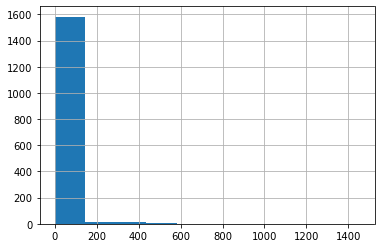

In [80]:
bioactivities_all.groupby("ligand.id (query)").size().hist()

In [81]:
bioactivities_all["ligand.bioactivity_standard_units"].unique()

array(['nM'], dtype=object)

In [82]:
bioactivities_all["ligand.bioactivity_standard_relation"].unique()

array(['='], dtype=object)

### Bioactivities from kinase ID(s)

In [83]:
remote.bioactivities.from_kinase_ids(10000000)

Kinase ID 10000000: Expected type to be dict for value [400, 'KLIFS error: The provided kinase ID(s) is/are invalid'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


In [84]:
remote.bioactivities.from_kinase_ids([33, 34])

Ligand ID 759: Expected type to be dict for value [400, 'KLIFS error: This ligand is not available in ChEMBL.'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


,kinase.pref_name,kinase.uniprot,species.chembl,ligand.bioactivity_standard_type,ligand.bioactivity_standard_relation,ligand.bioactivity_standard_value,ligand.bioactivity_standard_units,ligand.bioactivity_pchembl_value,ligand.id (query)
0,3-phosphoinositide dependent protein kinase-1,O15530,Homo sapiens,Ki,=,1584.89,nM,5.80,920
1,"AMP-activated protein kinase, alpha-1 subunit",Q13131,Homo sapiens,Ki,=,630.96,nM,6.20,920
2,BR serine/threonine-protein kinase 1,Q8TDC3,Homo sapiens,Ki,=,2511.89,nM,5.60,920
3,CaM kinase I delta,Q8IU85,Homo sapiens,Ki,=,1584.89,nM,5.80,920
4,CaM kinase II alpha,Q9UQM7,Homo sapiens,Ki,=,3162.28,nM,5.50,920
...,...,...,...,...,...,...,...,...,...
80,Vascular endothelial growth factor receptor 2,P35968,Homo sapiens,IC50,=,3900.0,nM,5.41,920
81,Vascular endothelial growth factor receptor 2,P35968,Homo sapiens,Ki,=,398.11,nM,6.40,920
82,Vascular endothelial growth factor receptor 3,P35916,Homo sapiens,IC50,=,4600.0,nM,5.34,920
83,Vascular endothelial growth factor receptor 3,P35916,Homo sapiens,Ki,=,316.23,nM,6.50,920


### Bioactivities from ligand ID(s)

In [85]:
remote.bioactivities.from_ligand_ids(1000000)

Ligand ID 1000000: Expected type to be dict for value [400, 'KLIFS error: Could not find a ligand with the provided ID.'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


In [86]:
remote.bioactivities.from_ligand_ids([50, 51])

,kinase.pref_name,kinase.uniprot,species.chembl,ligand.bioactivity_standard_type,ligand.bioactivity_standard_relation,ligand.bioactivity_standard_value,ligand.bioactivity_standard_units,ligand.bioactivity_pchembl_value,ligand.id (query)
0,Dual specificity protein kinase CLK3,P49761,Homo sapiens,IC50,=,29.2,nM,7.54,50
1,Dual specificty protein kinase CLK1,P49759,Homo sapiens,IC50,=,8.9,nM,8.05,50
2,Glycogen synthase kinase-3 beta,P49841,Homo sapiens,IC50,=,210.0,nM,6.68,50
3,Glycogen synthase kinase-3 beta,P49841,Homo sapiens,IC50,=,140.0,nM,6.85,50
4,"Interferon-induced, double-stranded RNA-activa...",P19525,Homo sapiens,IC50,=,1600.0,nM,5.80,50
5,Vascular endothelial growth factor receptor 2,P35968,Homo sapiens,IC50,=,32.0,nM,7.50,50
6,Vascular endothelial growth factor receptor 2,P35968,Homo sapiens,IC50,=,32.0,nM,7.50,50
7,Ribosomal protein S6 kinase alpha 3,P51812,Homo sapiens,IC50,=,340.0,nM,6.47,51
8,Ribosomal protein S6 kinase alpha 3,P51812,Homo sapiens,IC50,=,5.0,nM,8.30,51
9,Ribosomal protein S6 kinase alpha 3,P51812,Homo sapiens,IC50,=,5.0,nM,8.30,51


## Interactions

### Interaction types

In [87]:
remote.interactions.interaction_types

,interaction.id,interaction.name
0,1,Apolar contact
1,2,Aromatic face-to-face
2,3,Aromatic edge-to-face
3,4,Hydrogen bond donor (protein)
4,5,Hydrogen bond acceptor (protein)
5,6,Protein cation - ligand anion
6,7,Protein anion - ligand cation


### All interactions

In [88]:
remote.interactions.all_interactions()

,structure.id,interaction.fingerprint
0,1,0000000000000010000000000000000000000000000000...
1,3,0000000000000010000000000000000000000000000000...
2,5,0000000000000010000000000000000000000000000000...
3,6,0000000000000010000001000000000000000000000000...
4,7,0000000000000010001001000000000000000000000000...
...,...,...
9594,12701,0000000000000010000001000000100000010000000000...
9595,12702,0000000000000010000001000000100000010000000000...
9596,12703,0000000000000010000001000000000000010000000000...
9597,12708,0000000000000000000000000000000000000000000000...


In [89]:
local.interactions.all_interactions()

,structure.pdb,structure.alternate_model,structure.chain,interaction.fingerprint
0,3sxr,-,A,0000000000000010000001000000000000000000000000...
1,6uuo,-,A,0000000000000000000000000000000000000000000000...
2,1fpu,-,A,0000000000000010000000000000000000000000000000...
3,1fpu,-,B,0000000000000010000000000000000000000000000000...


### Interactions from structure IDs

In [90]:
remote.interactions.from_structure_ids(1000000)

Expected type to be dict for value [400, 'KLIFS error: An unknown structure ID was provided'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


In [91]:
remote.interactions.from_structure_ids([33, 34])

,structure.id,interaction.fingerprint
0,33,0000000000000010000001000000000000000000000000...
1,34,0000000000000010000000000000000000000000000000...


### Interactions from ligand IDs

In [92]:
remote.interactions.from_ligand_ids(10000000)

In [93]:
remote.interactions.from_ligand_ids([33, 34])

,structure.id,interaction.fingerprint
0,67,1000000000000010000001000000100000010000000000...
1,68,0000000000000010000001000000000000000000000000...
2,69,0000000000000010000001000000000000000000000000...


### Interactions from kinase IDs

In [94]:
remote.interactions.from_kinase_ids(100000000)

Expected type to be dict for value [400, 'KLIFS error: An unknown kinase ID was provided'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


In [95]:
remote.interactions.from_kinase_ids([22])

,structure.id,interaction.fingerprint
0,7085,0000000000000010000001000000000000000000000000...
1,7086,0000000000000010000001000000000000000000000000...
2,7087,0000000000000010000001001000000000000000000000...
3,7088,0000000000000010000001001000000000000000000000...


## Coordinates

### Complex

Quick access to complex in mol2 format using `fetch` defaults.

In [96]:
remote.coordinates.fetch(12347).head()

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge,backbone
0,1,O,-29.7742,11.3869,19.8824,O.3,1,HOH901,0.0000,None
1,2,H1,-28.8142,11.3869,19.8824,H,1,HOH901,0.0000,None
2,3,H2,-30.0645,12.0339,20.5295,H,1,HOH901,0.0000,None
3,4,C11,3.5395,20.5508,39.1755,C.ar,2,QH1_0,-0.0230,None
4,5,C13,2.1865,20.1689,41.3174,C.2,2,QH1_0,-0.3016,None


In [97]:
file_path = "../../opencadd/tests/databases/data/KLIFS_download/HUMAN/BRAF/6uuo_chainA/complex.mol2"
local.coordinates.load(file_path).head()

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge,backbone
0,1,O,-29.7742,11.3869,19.8824,O.3,1,HOH901,0.0000,None
1,2,H1,-28.8142,11.3869,19.8824,H,1,HOH901,0.0000,None
2,3,H2,-30.0645,12.0339,20.5295,H,1,HOH901,0.0000,None
3,4,C11,3.5395,20.5508,39.1755,C.ar,2,QH1_0,-0.0230,None
4,5,C13,2.1865,20.1689,41.3174,C.2,2,QH1_0,-0.3016,None


In [98]:
remote.coordinates.fetch(33, input_format='pdb').keys()

Structural data keys: dict_keys(['ATOM', 'HETATM', 'ANISOU', 'OTHERS'])


dict_keys(['ATOM', 'HETATM', 'ANISOU', 'OTHERS'])

In [99]:
file_path = "../../opencadd/tests/databases/data/KLIFS_download/HUMAN/BRAF/6uuo_chainA/complex.pdb"
try:
    local.coordinates.load(file_path)
except FileNotFoundError as e:
    print(e)

File does not exist: ../../opencadd/tests/databases/data/KLIFS_download/HUMAN/BRAF/6uuo_chainA/complex.pdb.


In [100]:
remote.coordinates.save(12347, ".")

#### Ligand

In [101]:
remote.coordinates.fetch(12347, entity='ligand').head()

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge
0,1,C11,3.5395,20.5508,39.1755,C.ar,1,QH1,-0.0230
1,2,C13,2.1865,20.1689,41.3174,C.2,1,QH1,-0.3016
2,3,H13,2.1307,21.2113,41.5942,H,1,QH1,0.1500
3,4,C14,1.6145,19.1365,42.0727,C.2,1,QH1,-0.0540
4,5,C15,1.9395,17.8863,41.3313,C.ar,1,QH1,0.2560


In [102]:
file_path = "../../opencadd/tests/databases/data/KLIFS_download/HUMAN/BRAF/6uuo_chainA/ligand.mol2"
local.coordinates.load(file_path).head()

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge
0,1,C11,3.5395,20.5508,39.1755,C.ar,1,QH1,-0.0230
1,2,C13,2.1865,20.1689,41.3174,C.2,1,QH1,-0.3016
2,3,H13,2.1307,21.2113,41.5942,H,1,QH1,0.1500
3,4,C14,1.6145,19.1365,42.0727,C.2,1,QH1,-0.0540
4,5,C15,1.9395,17.8863,41.3313,C.ar,1,QH1,0.2560


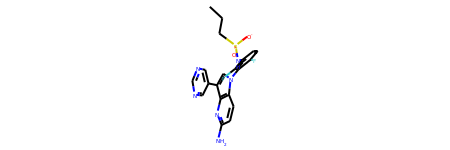

In [103]:
remote.coordinates.fetch(12347, entity='ligand', output_format='rdkit', compute2d=False)

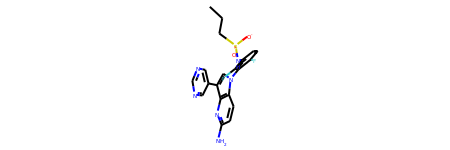

In [104]:
file_path = "../../opencadd/tests/databases/data/KLIFS_download/HUMAN/BRAF/6uuo_chainA/ligand.mol2"
local.coordinates.load(file_path, output_format="rdkit", compute2d=False)

#### Protein

In [105]:
remote.coordinates.fetch(12347, entity='protein').head()

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge,backbone
0,1,N,10.5459,36.4276,36.2952,N.4,1,TRP450,1.0,BACKBONE
1,2,H1,11.3045,36.9642,36.6910,H,1,TRP450,0.0,BACKBONE
2,3,H2,9.8719,37.0539,35.8786,H,1,TRP450,0.0,BACKBONE
3,4,H3,10.9079,35.8038,35.5881,H,1,TRP450,0.0,BACKBONE
4,5,CA,9.9005,35.6482,37.3473,C.3,1,TRP450,0.0,BACKBONE


In [106]:
file_path = "../../opencadd/tests/databases/data/KLIFS_download/HUMAN/BRAF/6uuo_chainA/protein.mol2"
local.coordinates.load(file_path).head()

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge,backbone
0,1,N,10.5459,36.4276,36.2952,N.4,1,TRP450,1.0,BACKBONE
1,2,H1,11.3045,36.9642,36.6910,H,1,TRP450,0.0,BACKBONE
2,3,H2,9.8719,37.0539,35.8786,H,1,TRP450,0.0,BACKBONE
3,4,H3,10.9079,35.8038,35.5881,H,1,TRP450,0.0,BACKBONE
4,5,CA,9.9005,35.6482,37.3473,C.3,1,TRP450,0.0,BACKBONE


#### Pocket

In [107]:
remote.coordinates.fetch(12347, entity='pocket').head()

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge,backbone
0,1,N,9.0135,18.2386,51.8602,N.3,1,GLN461,0.0,BACKBONE
1,2,H,8.2695,18.7862,52.2683,H,1,GLN461,0.0,BACKBONE
2,3,CA,8.8107,16.8107,51.6561,C.3,1,GLN461,0.0,BACKBONE
3,4,HA,9.7186,16.2932,51.9661,H,1,GLN461,0.0,BACKBONE
4,5,C,8.5594,16.4924,50.1864,C.2,1,GLN461,0.0,BACKBONE


In [108]:
file_path = "../../opencadd/tests/databases/data/KLIFS_download/HUMAN/BRAF/6uuo_chainA/pocket.mol2"
local.coordinates.load(file_path).head()

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge,backbone
0,1,N,9.0135,18.2386,51.8602,N.3,1,GLN461,0.0,BACKBONE
1,2,H,8.2695,18.7862,52.2683,H,1,GLN461,0.0,BACKBONE
2,3,CA,8.8107,16.8107,51.6561,C.3,1,GLN461,0.0,BACKBONE
3,4,HA,9.7186,16.2932,51.9661,H,1,GLN461,0.0,BACKBONE
4,5,C,8.5594,16.4924,50.1864,C.2,1,GLN461,0.0,BACKBONE


#### Water

In [109]:
try:
    remote.coordinates.fetch(12347, entity='water')
except ValueError as e:
    print(e)

Entity water is not available remotely.


In [110]:
file_path = "../../opencadd/tests/databases/data/KLIFS_download/HUMAN/BRAF/6uuo_chainA/water.mol2"
local.coordinates.load(file_path).head()

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge
0,1,O,-29.7742,11.3869,19.8824,O.3,1,HOH,0.0
1,2,H1,-28.8142,11.3869,19.8824,H,1,HOH,0.0
2,3,H2,-30.0645,12.0339,20.5295,H,1,HOH,0.0
